In [85]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [86]:
nx = 41
ny = 41
l = 1.0
h = 1.0

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [87]:
phi = numpy.zeros((ny, nx))
w = numpy.zeros((ny, nx))

In [88]:
phi

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [90]:
w

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [91]:
def l1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [92]:
def stokesflow(phi, w, l1_target):
    
    l1_errorphi = 1
    l1_errorw = 1
    phin = numpy.empty_like(phi)
    wn = numpy.empty_like(w)
   
    while l1_errorphi > l1_target or l1_errorw > l1_target:
        
        phin = phi.copy()
        
        phi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((phin[1:-1,2:]+phin[1:-1,:-2])*dy**2 +\
                        (phin[2:,1:-1] + phin[:-2,1:-1])*dx**2 +\
                         w[1:-1,1:-1]*dx**2*dy**2)
    
        # boundary condition
        phi[0, :] = 0
        phi[-1, :] = 0
        phi[:, 0] = 0
        phi[:, -1] = 0
        
        l1_errorphi = l1norm(phi, phin)
        
        wn = w.copy()
        
        w[1:-1,1:-1] = .25 * (wn[1:-1,2:] + wn[1:-1, :-2] \
                       + wn[2:, 1:-1] + wn[:-2, 1:-1])
        # boundary condition
        #upper boundary
        w[0, :] = (-1/(2*dy**2))*(8*phi[1, :] - phi[2, :])\
                  - 3*1.0/dy
        #right boundary
        w[:, -1] = (-1/(2*dx**2))*(8*phi[:, -2] - phi[:, -3])\
                  - 3*0.0/dy
        
        #bottom boundary
        w[-1, :] = (-1/dy**2)*(4*phi[-1, :] - 2*phi[-3, :]-\
                    2*phi[-2, :]) - 6*0.0/dy
        
        #left boundary
        w[:, 0] = (-1/dx**2)*(4*phi[:, 0] - 2*phi[:, 1]-\
                    2*phi[:, 2]) - 6*0.0/dy
        
        l1_errorw = l1norm(w, wn)
    return phi, w

In [93]:
phi_f, w_f = stokesflow(phi, w, l1_target)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: overflow encountered in add
/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


In [94]:
phi_f

array([[  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,  -1.27298646e+299,  -1.10263492e+299, ...,
         -8.64489468e+287,  -2.06802366e+287,   0.00000000e+000],
       [  0.00000000e+000,  -3.38933369e+299,  -3.04340638e+299, ...,
         -3.22075978e+288,  -8.64489468e+287,   0.00000000e+000],
       ..., 
       [  0.00000000e+000,              -inf,  -1.90730433e+304, ...,
         -3.04340638e+299,  -1.10263492e+299,   0.00000000e+000],
       [  0.00000000e+000,              -inf,              -inf, ...,
         -3.38933369e+299,  -1.27298646e+299,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000]])

In [95]:
w_f

array([[ -0.00000000e+000,   5.43564640e+302,   4.62213838e+302, ...,
          2.95612477e+291,   6.31943571e+290,  -0.00000000e+000],
       [ -7.60198842e+302,  -2.46553033e+302,  -3.15034573e+301, ...,
          2.20741213e+291,   1.19824507e+291,   6.31943571e+290],
       [ -2.05847682e+303,  -9.20324077e+302,  -3.92980331e+302, ...,
          2.02507845e+291,   2.20741213e+291,   2.95612477e+291],
       ..., 
       [             -inf,              -inf,              -inf, ...,
         -3.92980331e+302,  -3.15034573e+301,   4.62213838e+302],
       [             -inf,              -inf,              -inf, ...,
         -9.20324077e+302,  -2.46553033e+302,   5.43564640e+302],
       [ -0.00000000e+000,              -inf,              -inf, ...,
         -2.05847682e+303,  -7.60198842e+302,  -0.00000000e+000]])

ValueError: could not convert string to float: 'phi_f'

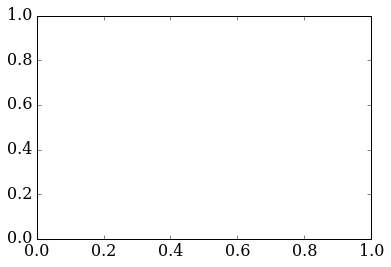

In [96]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('phi_f')
pyplot.imshow(phi)
pyplot.colorbar()
pyplot.show()